In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from IPython.display import display
from numpy import argmax, sqrt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.activations import sigmoid
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set plot style
plt.style.use('seaborn-v0_8-white')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [3]:
# Import data
stroke = pd.read_csv('../0_data/healthcare-dataset-stroke-data.csv', index_col=0)

In [4]:
# Display dataframe head
df = stroke.copy()
display(df.head)

<bound method NDFrame.head of        gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234  Female  80.0             1              0          Yes        Private   
44873  Female  81.0             0              0          Yes  Self-employed   
19723  Female  35.0             0              0          Yes  Self-employed   
37544    Male  51.0             0              0          Yes        Private   
44679  Fem

In [5]:
# Preprocess the data 
# Check for NAs
display(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Drop NAs
df.dropna(inplace=True)
display(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
# Explore the numeric data
round(df.describe(exclude = 'object'), 1)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.0,4909.0,4909.0,4909.0,4909.0,4909.0
mean,42.9,0.1,0.0,105.3,28.9,0.0
std,22.6,0.3,0.2,44.4,7.9,0.2
min,0.1,0.0,0.0,55.1,10.3,0.0
25%,25.0,0.0,0.0,77.1,23.5,0.0
50%,44.0,0.0,0.0,91.7,28.1,0.0
75%,60.0,0.0,0.0,113.6,33.1,0.0
max,82.0,1.0,1.0,271.7,97.6,1.0


In [8]:
# Explore the categorical data
round(df.describe(exclude = ['float', 'int64']), 1)

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2811,2490,1852


In [9]:
# Explore the target variable 
display(df["stroke"].value_counts())
value_counts = df["stroke"].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

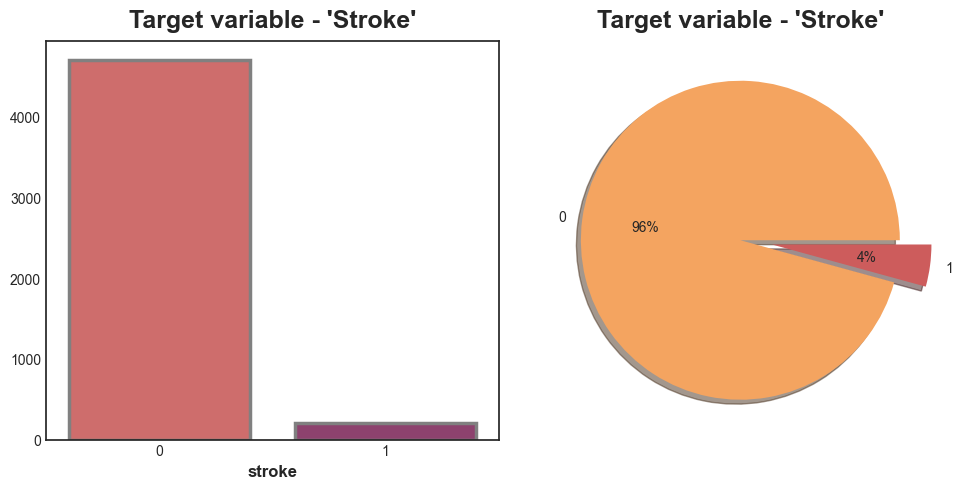

In [10]:
# Create a bar plot and pie chart to visualize the distribution of the target variable
# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot
value_counts = df["stroke"].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, palette="flare", linewidth=2.5, edgecolor="grey", ax=axes[0])
axes[0].set_title("Target variable - 'Stroke'")

# Pie chart
labels = [0, 1]
axes[1].pie(value_counts, labels=labels, colors=['sandybrown', 'indianred'], autopct='%.0f%%', shadow=True, explode=(0, 0.2))
axes[1].set_title("Target variable - 'Stroke'")

plt.tight_layout()

plt.show()

In [11]:
# Explore the feature hypertension
display(df["hypertension"].value_counts())
value_counts_ht = df["hypertension"].value_counts()

hypertension
0    4458
1     451
Name: count, dtype: int64

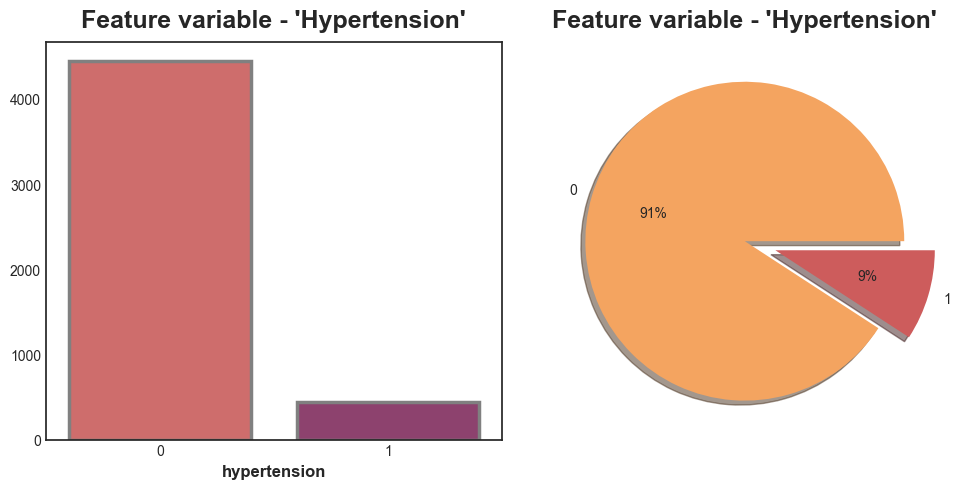

In [12]:
# Create a bar plot and pie chart to visualize the distribution of the feature 'hypertension'
# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot
value_counts_ht = df["hypertension"].value_counts()
sns.barplot(x=value_counts_ht.index, y=value_counts_ht.values, palette="flare", linewidth=2.5, edgecolor="grey", ax=axes[0])
axes[0].set_title("Feature variable - 'Hypertension'")

# Pie chart
labels = [0, 1]
axes[1].pie(value_counts_ht, labels=labels, colors=['sandybrown', 'indianred'], autopct='%.0f%%', shadow=True, explode=(0, 0.2))
axes[1].set_title("Feature variable - 'Hypertension'")

plt.tight_layout()

plt.show()

In [13]:
# Exploring the heart disease category
display(df["heart_disease"].value_counts())
value_counts_hd = df["heart_disease"].value_counts()

heart_disease
0    4666
1     243
Name: count, dtype: int64

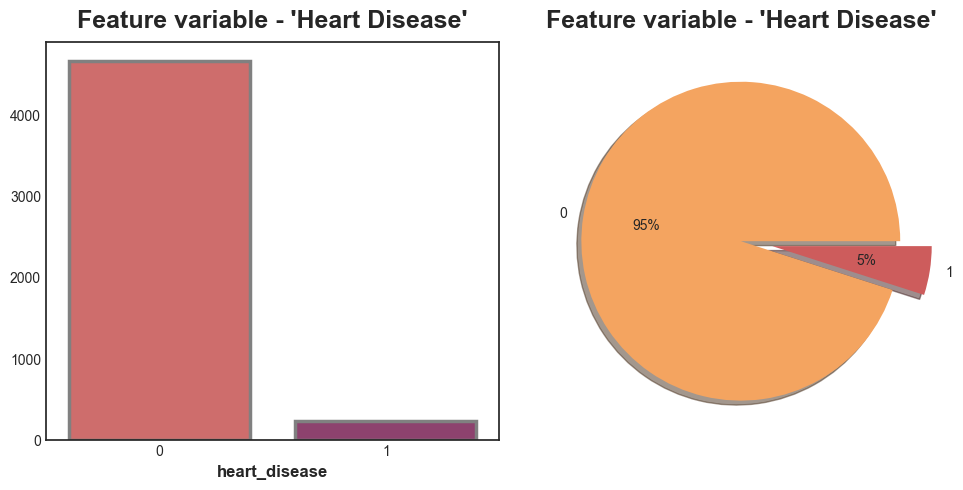

In [14]:
# Create a bar plot and pie chart to visualize the distribution of the feature 'heart disease'
# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot
value_counts_hd = df["heart_disease"].value_counts()
sns.barplot(x=value_counts_hd.index, y=value_counts_hd.values, palette="flare", linewidth=2.5, edgecolor="grey", ax=axes[0])
axes[0].set_title("Feature variable - 'Heart Disease'")

# Pie chart
labels = [0, 1]
axes[1].pie(value_counts_hd, labels=labels, colors=['sandybrown', 'indianred'], autopct='%.0f%%', shadow=True, explode=(0, 0.2))
axes[1].set_title("Feature variable - 'Heart Disease'")

plt.tight_layout()
plt.show()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

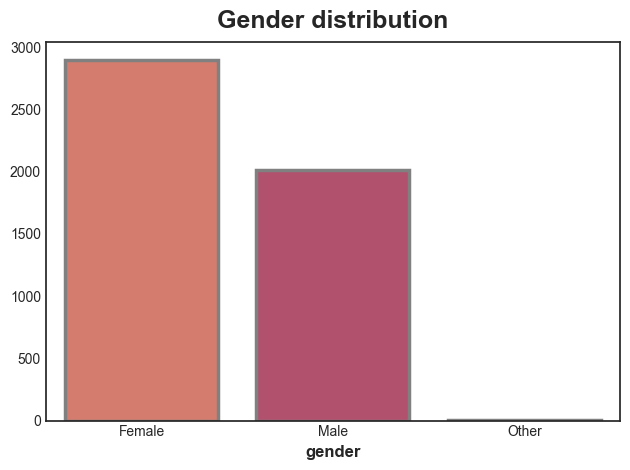

In [15]:
# Explore the gender distribution
display(df["gender"].value_counts())
value_counts_g = df["gender"].value_counts()

# Plot the gender distribution
sns.barplot(x=value_counts_g.index, y=value_counts_g.values, palette="flare", linewidth=2.5, edgecolor="grey")
plt.title("Gender distribution")
plt.show()

In [16]:
#  Calculate the ratios of comorbidities
str_hd_per_str = round(sum((df.stroke == 1) & (df.heart_disease == 1))/sum(df.stroke == 1), 2)
print("Percentage of pat. with comorbidities heart disease and stroke / all stroke pat.:", str_hd_per_str)

str_nohd_per_str = round(sum((df.stroke == 1) & (df.heart_disease == 0))/sum(df.stroke == 1), 2)
print("Percentage of pat. without heart disease but with stroke / all stroke pat.:", str_nohd_per_str,'\n')

nostr_hd_per_nostr = round(sum((df.stroke == 0) & (df.heart_disease == 1))/sum(df.stroke == 0), 2)
print("Percentage of pat. without stroke but with heart disease / all pat. without stroke:", nostr_hd_per_nostr)

nostr_nohd_per_nostr = round(sum((df.stroke == 0) & (df.heart_disease == 0))/sum(df.stroke == 0), 2)
print("Percentage of pat. without stroke and heart disease / all pat. without stroke.:", nostr_nohd_per_nostr,'\n')

str_ht_per_str = round(sum((df.stroke == 1) & (df.hypertension == 1))/sum(df.stroke == 1), 2)
print("Percentage of pat. with comorbidities hypertension and stroke / all stroke pat.:", str_ht_per_str)

str_noht_per_str = round(sum((df.stroke == 1) & (df.hypertension == 0))/sum(df.stroke == 1), 2)
print("Percentage of pat. withput hypertension but with stroke / all stroke pat:", str_noht_per_str, '\n')

nostr_ht_per_nostr = round(sum((df.stroke == 0) & (df.hypertension == 1))/sum(df.stroke == 0), 2)
print("Percentage of pat. with hypertension but without stroke / all pat without stroke.:", nostr_ht_per_nostr )

nostr_noht_per_nostr = round(sum((df.stroke == 0) & (df.hypertension == 0))/sum(df.stroke == 0),2)
print("Percentage of pat. without stroke and hypertension  / all pat without stroke.:", nostr_noht_per_nostr)

Percentage of pat. with comorbidities heart disease and stroke / all stroke pat.: 0.19
Percentage of pat. without heart disease but with stroke / all stroke pat.: 0.81 

Percentage of pat. without stroke but with heart disease / all pat. without stroke: 0.04
Percentage of pat. without stroke and heart disease / all pat. without stroke.: 0.96 

Percentage of pat. with comorbidities hypertension and stroke / all stroke pat.: 0.29
Percentage of pat. withput hypertension but with stroke / all stroke pat: 0.71 

Percentage of pat. with hypertension but without stroke / all pat without stroke.: 0.08
Percentage of pat. without stroke and hypertension  / all pat without stroke.: 0.92


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


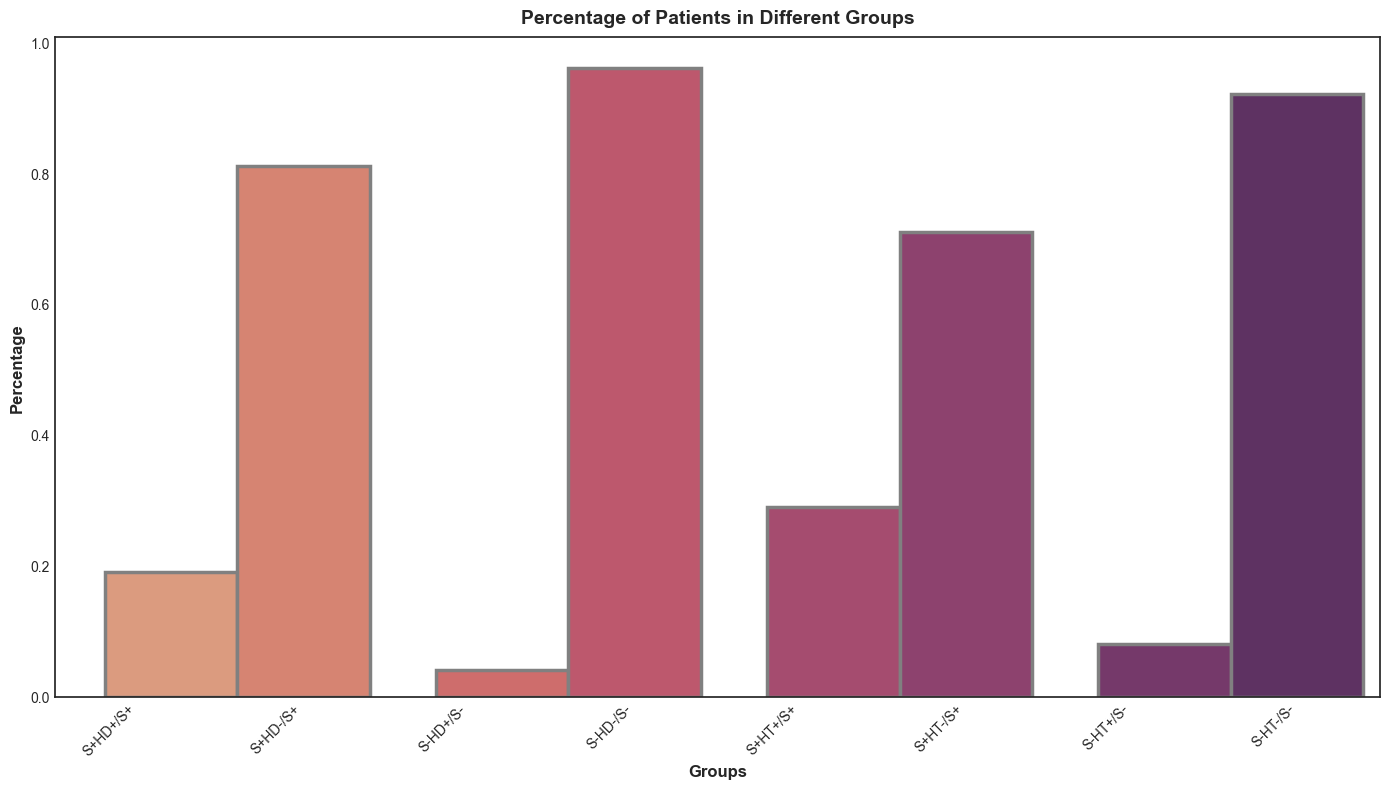

In [17]:
# Visualize the comorbidities
percentages = {
    'S+HD+/S+': str_hd_per_str,
    'S+HD-/S+': str_nohd_per_str,
    'S-HD+/S-': nostr_hd_per_nostr,
    'S-HD-/S-': nostr_nohd_per_nostr,
    'S+HT+/S+': str_ht_per_str,
    'S+HT-/S+': str_noht_per_str,
    'S-HT+/S-': nostr_ht_per_nostr,
    'S-HT-/S-': nostr_noht_per_nostr,
}

# Create a bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=list(percentages.keys()), y=list(percentages.values()), palette="flare", linewidth=2.5, edgecolor="grey")

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Groups', fontsize=12)

plt.title('Percentage of Patients in Different Groups', fontsize=14)

# Add some space after every second bar
for i, bar in enumerate(ax.patches):
    if i % 2 == 0:
        bar.set_x(bar.get_x() + 0.2)

In [18]:
# Create own, fictional and suggestive data set for model testing
own_test_data = {'gender': ['Male', 'Male', 'Female','Female','Female','Male'], 'age': [67, 88, 85, 20, 21, 35], 'hypertension':[1, 1, 1, 0, 0, 0], 'heart_disease':[1, 1, 1, 0, 0, 0], 'ever_married':['Yes', 'Yes', 'Yes', 'No', 'No', 'Yes'], 'work_type':['Private', 'Private', 'Self-employed', 'Private', 'Private', 'Self-employed'], 'Residence_type': ['Urban', 'Urban','Rural', 'Urban', 'Urban', 'Rural'], 'avg_glucose_level': [240.00, 200.00, 250.04, 120.98, 100.78, 115.00], 'bmi':[45, 50, 39, 23, 21, 20], 'smoking_status_formerly smoked':[False, False, False, False, False, False], 'smoking_status_never smoked':[False, False, False, True, True, True], 'smoking_status_smokes':[True, True, True, False, False, False], 'stroke':[1, 1, 1, 0, 0, 0]}
own_test_data_df = pd.DataFrame(data=own_test_data)
own_test_data_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,Male,67,1,1,Yes,Private,Urban,240.00,45,False,False,True,1
1,Male,88,1,1,Yes,Private,Urban,200.00,50,False,False,True,1
2,Female,85,1,1,Yes,Self-employed,Rural,250.04,39,False,False,True,1
3,Female,20,0,0,No,Private,Urban,120.98,23,False,True,False,0
4,Female,21,0,0,No,Private,Urban,100.78,21,False,True,False,0
5,Male,35,0,0,Yes,Self-employed,Rural,115.00,20,False,True,False,0


In [19]:
# Select the predictor variables X and the target variable y
columns_to_drop = ['stroke', 'ever_married', 'work_type', 'Residence_type', 'gender'] 
X = df.drop(columns_to_drop, axis=1)
y = df['stroke']

# Select the predictor variables X and the target variable y for own data set
X_own = own_test_data_df.drop(columns_to_drop, axis=1)
y_own = own_test_data_df['stroke']

# One-hot encode categorical variables
# The 'own data set' smoking status variable already has this format
X = pd.get_dummies(X, columns=['smoking_status'], drop_first=True)

In [20]:
# Split dataset into 80% train and 20% temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary set into 50% validation and 50% test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (3927, 8) (3927,)
Validation set shape: (491, 8) (491,)
Test set shape: (491, 8) (491,)


In [21]:
# Standardize numeric variables
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_own[numeric_cols] = scaler.transform(X_own[numeric_cols])

In [22]:
# Convert the train, validate, test and own data set into an array
X_train_np = np.asarray(X_train).astype('float32')
X_val_np = np.asarray(X_val).astype('float32')
X_test_np = np.asarray(X_test).astype('float32')
X_own_np = np.asarray(X_own).astype('float32')

y_train_np = np.asarray(y_train).astype('float32')
y_val_np = np.asarray(y_val).astype('float32')
y_test_np = np.asarray(y_test).astype('float32')
y_own_np = np.asarray(y_own).astype('float32')

In [23]:
# Convert the train, validate, test and own data set into a tensor
X_train_tensor = tf.convert_to_tensor(X_train_np)
X_val_tensor = tf.convert_to_tensor(X_val_np)
X_test_tensor = tf.convert_to_tensor(X_test_np)
X_own_tensor = tf.convert_to_tensor(X_own_np)

y_train_tensor = tf.convert_to_tensor(y_train_np)
y_val_tensor = tf.convert_to_tensor(y_val_np)
y_test_tensor = tf.convert_to_tensor(y_test_np)
y_own_tensor = tf.convert_to_tensor(y_own_np)

In [24]:
# Define the model
model = Sequential([
    layers.Dense(256, input_dim=X_train_tensor.shape[1], activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

In [25]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# Use early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Fit the model
history = model.fit(
    X_train_tensor, y_train_tensor,
    validation_data=(X_val_tensor, y_val_tensor),
    batch_size=300,
    epochs=200,
    callbacks=[early_stopping],
    verbose=10,  
)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200


Best Validation Loss: 0.1645
Best Validation Accuracy: 0.9532


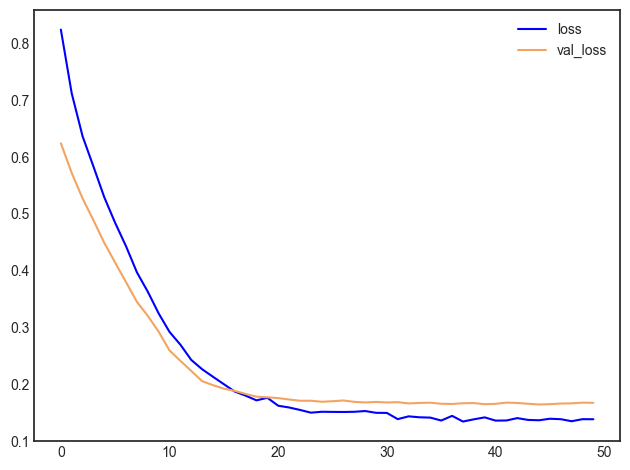

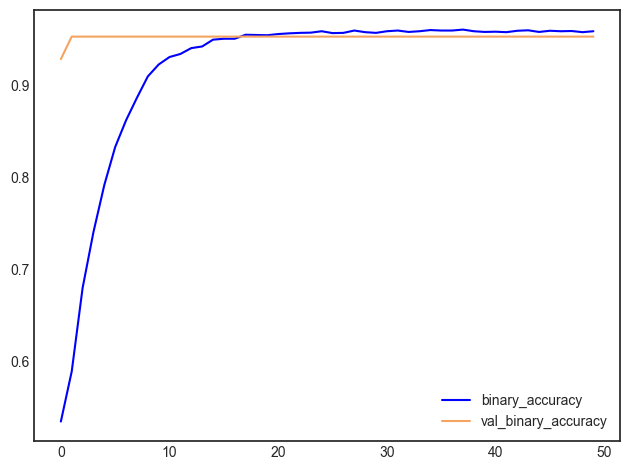

In [26]:
# Plot the validation loss and accuracy 
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(color=['blue', 'sandybrown'])
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(color=['blue', 'sandybrown'])

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [27]:
# Make predictions with test data 
# The tf/keras function predict() returns the probability of the positive class
y_pred = model.predict(X_test_tensor)

16/16 [==============================] - 0s 2ms/step


Best Threshold=0.054400, G-Mean=0.822


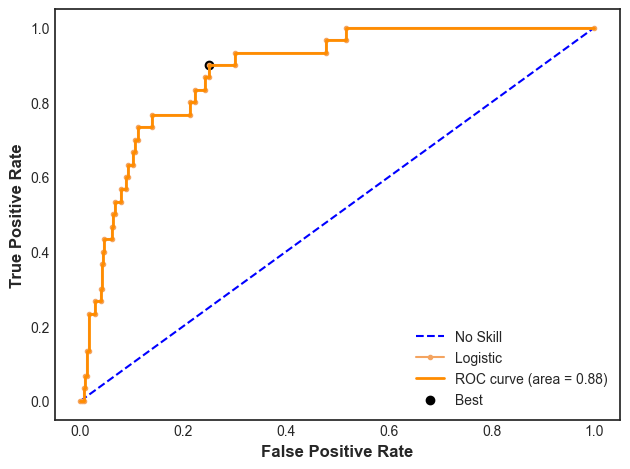

In [28]:
# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_tensor, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate the g-means for each threshold
gmeans = sqrt(tpr * (1-fpr))

# Locate the index of the largest g-mean
ix = argmax(gmeans)
best_gmean = gmeans[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Plot the ROC curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill', color='blue')
plt.plot(fpr, tpr, marker='.', label='Logistic', color = 'sandybrown')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [29]:
# Show the AUC as a performance parameter
print('AUC: ', round(roc_auc, 2))

AUC:  0.88


In [38]:
# Set the optimal threshold value. This is necessary due to the imbalanced target variable
threshold = 0.054400

# Apply thresholding to the earlier predictions  to show the final classification (1=stroke, 0=no stroke)
y_pred_binary = np.where(y_pred > threshold, 1, 0)

In [39]:
# Make predictions for own, suggestive data set
y_pred_own = model.predict(X_own_tensor)
print(y_pred_own)

1/1 [==============================] - 0s 26ms/step
[[0.45597568]
 [0.41204438]
 [0.53440535]
 [0.00951238]
 [0.00795993]
 [0.01373277]]


In [54]:
# Apply the adapted threshold to the calculated probabilites for y_pred_own to show the final classification (1=stroke, 0=no stroke)
y_pred_own_classes = np.where(y_pred_own > threshold, 1, 0)
y_pred_own_classes

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0]])

In [55]:
# Save the whole CNN model
model.save('models/stroke_prediction_cnn_model.keras')

In [56]:
# Load the model as new_model to reuse it again
new_model = tf.keras.models.load_model('models/stroke_prediction_cnn_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       